## Question 3
Solution from Chaolun Wang

#### 1)

Because A has full rank, A has n nonzero singular values($\sigma_1$ to $\sigma_n$). So we have:
$$
A^TA=(U\Sigma V^T)^T(U\Sigma V^T)\\
=V \Sigma^T U^T U \Sigma V^T\\
=V \Sigma^T \Sigma V^T\\
=V \Sigma^T \Sigma  V^{-1}
$$
So we have:
$$
\Sigma^T \Sigma=V^{-1} (A^T A)V
$$
Therefor, $\Sigma^T \Sigma$ is the similar matirx of $A^T A$, according to the definition of similar matrix. So $\Sigma^T \Sigma$ shares the same set of eigenvalue as $A^T A$. 
$$
\Sigma^T \Sigma=
\begin{bmatrix}
    \sigma_1^2 & 0 & 0 & \dots  & 0 \\
    0 & \sigma_2^2 & 0 & \dots  & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
   0 & 0 & 0 & \dots  & \sigma_n^2
\end{bmatrix}
$$
which is a diagonal matirx

So the eigenvalues of $\Sigma^T \Sigma$ are $\sigma_1^2,\sigma_2^2,...,\sigma_n^2$. which are also the eigenvalues of $A^TA$. So the nonzero singular value of A are the square roots of the nonzero eigenvalues of $A^TA$.

This is not a good way to find the singular values because the method is not stable, since $A^T A$ are likely to generate ill conditioned matrix. The condition number of $A^T A$(given by $\frac{\sigma_{max}^2}{\sigma_{min}^2}$) is the square of the condition number of A(given by $\frac{\sigma_{max}}{\sigma_{min}}$).

#### 2)
Define A as the matrix needs to be approximate. The reason that SVD can be used for low-rank approximation of D is becaue the cost function:
$$
min_{\hat{A}}||A-\hat{A}||_F
$$
subject to $rank(\hat{A})\le rank(A)$ has analitical solution in terms of singular value decomposition.

(https://en.wikipedia.org/wiki/low_rank_approximation)

To comute a rank k approximation:

Firstly do SVD on A:
$$
U\Sigma V^T=A
$$
Denote $u_i$ to be the ith column of U, $v_i$ to be the ith column of V. $\sigma_i$ is the ith largest singular value of A. 

The rank k approximation of A is given by:

$$
\hat{A}=\sum^{k}_{i=1}\sigma_i u_i v_i^T
$$
The reason we need to use the summation of first kth $\sigma_i u_i v_i^T$ is:

because $||u_i||_2=1$, $||v_i||_2=1$, we have:
$$
||u_i v_i||_F=1
$$
for any i. So the value of $||\sigma_iu_i v_i||_F$ is only determined by the magnitude of $||\sigma_i||$. Therefore, if we choose the summation of the first kth $\sigma_i u_i v_i^T$ we can get a better approximation of A, which is $\sum^{n}_{i=1}\sigma_i u_i v_i^T$.


#### 3)

The error of Low-rank approximation in terms of Frobenius norm is given by:
$$
min_{rank(\hat{A})\le k} ||A-\hat(A)||_F=\sqrt{\sigma_{k+1}^2+\sigma_{k+2}^2+...+\sigma_n^2}
$$
where n=rank(A)

(https://en.wikipedia.org/wiki/Low_rank_approximation)

so we have the relative error to be:
$$
Err(k)=\sqrt{\frac{ \sum_{i=k+1}^{n}\sigma_i^2 }{ \sum_{i=1}^n  \sigma_i^2}}
$$
To balance the work and accuracy, we can set a threashold(Tol) to the relative error(Err) and find the smallest k which satisfys:
$$
Err(k)\le Tol
$$
In the given example, the threashold was set to be 0.01, which gives the smallest corresponding k to be 6. Applying this algorithm on the matrix A, I got the rank 6 approximation of A:

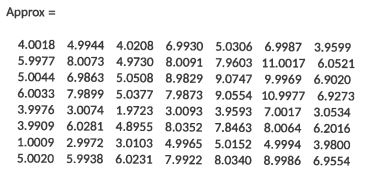

In [2]:
from IPython.display import Image
Image("figure.jpg")

#### 4)

$$
HQ=
\begin{bmatrix}
    0 & A^T \\
    A & 0 \\
\end{bmatrix}
*
\begin{bmatrix}
    V & V \\
    U & -U \\
\end{bmatrix}\\
=
\begin{bmatrix}
    0 & V\Sigma^T U^T \\
    U\Sigma V^T & 0 \\
\end{bmatrix}
*
\begin{bmatrix}
    V & V \\
    U & -U \\
\end{bmatrix}\\
=
\begin{bmatrix}
    V\Sigma^T U^T U & -V\Sigma^T U^T U \\
    U\Sigma V^T V & U \Sigma V^T V \\
\end{bmatrix}\\
=
\begin{bmatrix}
    V \Sigma^T & -V \Sigma^T \\
    U \Sigma &  U \Sigma \\
\end{bmatrix}
$$
define B as:
$
\begin{bmatrix}
    \Sigma & 0 \\
    0 &  -\Sigma \\
\end{bmatrix}
$ which is a diagonal matrix, we have:

$$
QB=
\begin{bmatrix}
    V & V \\
    U & -U \\
\end{bmatrix}
*
\begin{bmatrix}
    \Sigma & 0 \\
    0 &  -\Sigma \\
\end{bmatrix}
=
\begin{bmatrix}
    V \Sigma^T & -V \Sigma^T \\
    U \Sigma &  U \Sigma \\
\end{bmatrix}
$$
So we have:
$$
HQ=QB
$$

because:
$$
\frac{1}{2}
\begin{bmatrix}
    V & V \\
    U & -U \\
\end{bmatrix}^T
*
\begin{bmatrix}
    V & V \\
    U & -U \\
\end{bmatrix}=I
$$
which means:
$$
\frac{1}{2}
\begin{bmatrix}
    V & V \\
    U & -U \\
\end{bmatrix}^T
*
Q=I
$$
Q is invertible.

So we have:
$$
Q^{-1}HQ=B
$$

So B is the similar matirx of H, thus the eigenvalues of H are the diagonal elements of B, which is +-1 times singularvalues of A.